In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [6]:
#number of rows and columns in training set and testing set
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [7]:
#quick look on the properties of target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

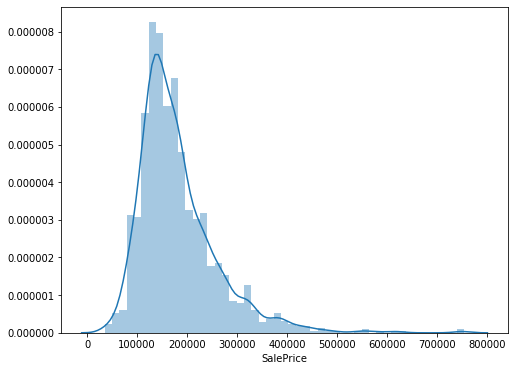

In [8]:
plt.figure(figsize = (8, 6))
sns.distplot(train['SalePrice']);

In [9]:
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [10]:
#Finding out the outliers
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][: 10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print('Low range of saleprice:\n', low_range)
print('\nHigh range of saleprice:\n', high_range)

Low range of saleprice:
 [[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

High range of saleprice:
 [[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


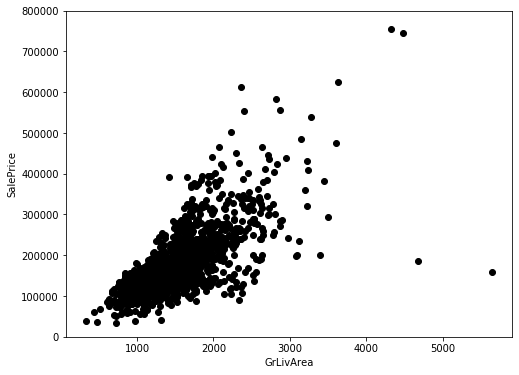

In [11]:
x = train['GrLivArea']
y = train['SalePrice']
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ok')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.ylim(0, 800000);

In [12]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

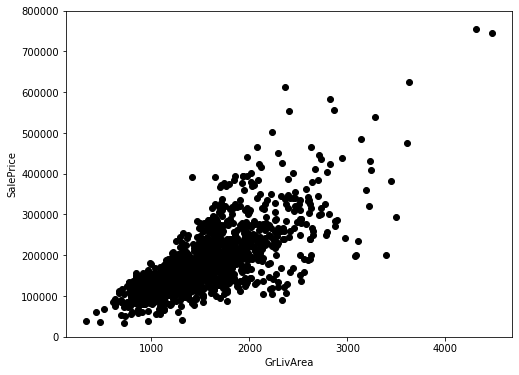

In [13]:
x = train['GrLivArea']
y = train['SalePrice']
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ok')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.ylim(0, 800000);

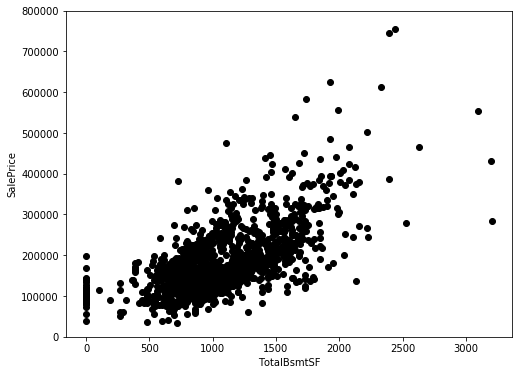

In [14]:
x = train['TotalBsmtSF']
y = train['SalePrice']
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ok')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.ylim(0, 800000);

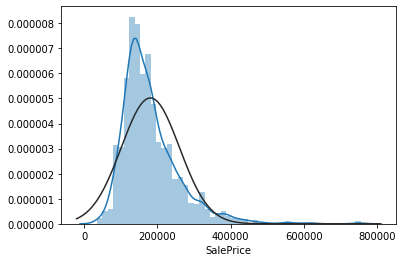

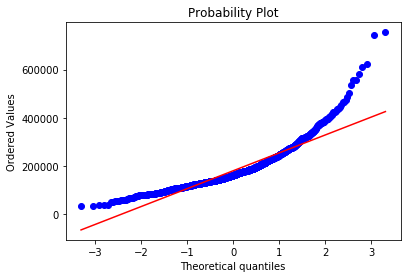

In [15]:
sns.distplot(train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt);

In [16]:
#transformation on normality
train['SalePrice'] = np.log(train['SalePrice'])

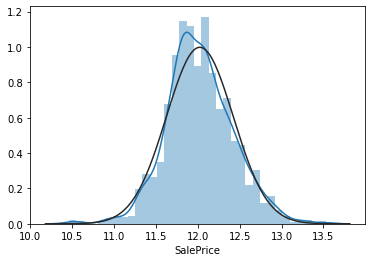

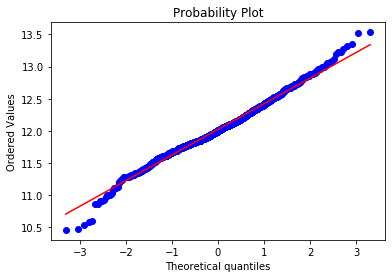

In [17]:
sns.distplot(train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)

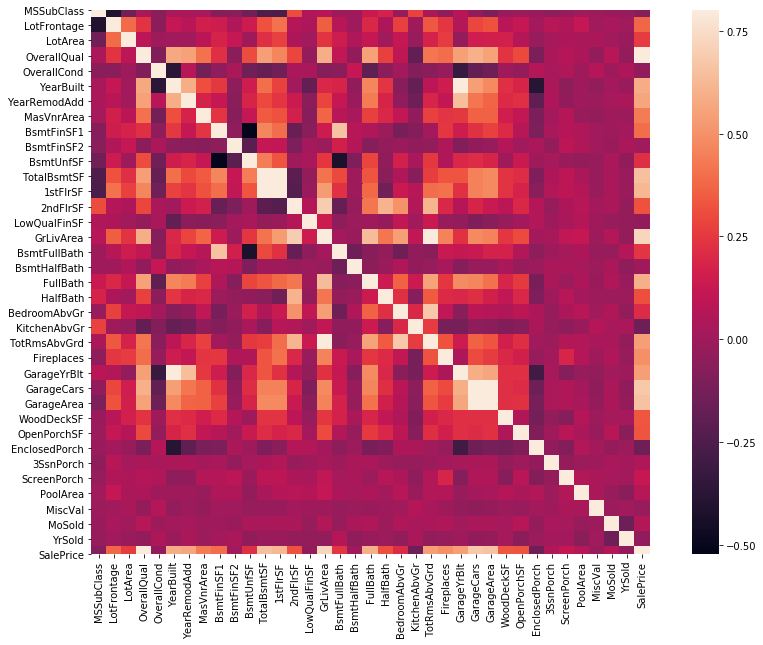

In [18]:
#confusion matrix of all varaiables
correlation = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, vmax = 0.8, square = True);

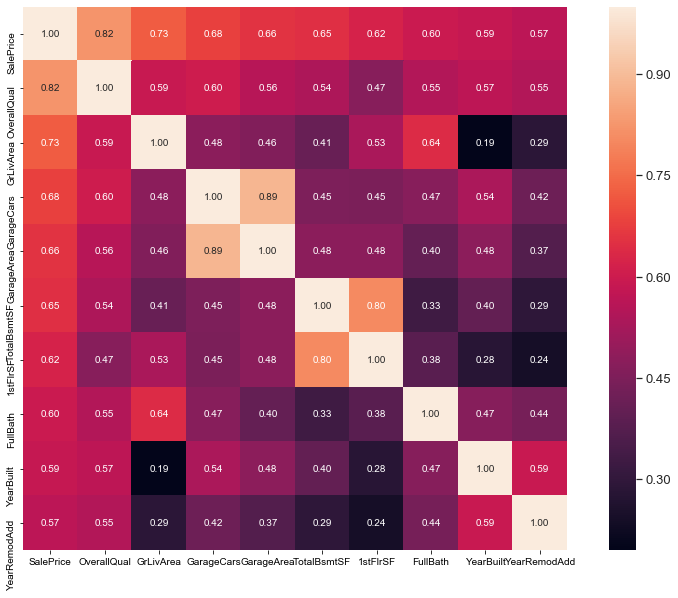

In [19]:
#only look at top 10 variables which have the largeset correlation with SalePrice
#multicollinearity is found between some variables 
k = 10
fig, ax = plt.subplots(figsize = (15, 10))
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.2)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values, ax = ax)
ymin, ymax = hm.get_ylim()
hm.set_ylim(ymin + 0.5, ymax - 0.5)
plt.show();

In [20]:
#Finding out missing values for training set
total_1 = train.isnull().sum().sort_values(ascending = False)
percent_1 = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data_1 = pd.concat([total_1, percent_1], keys = ['Total', 'Percent'], axis = 1)
missing_data_1.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


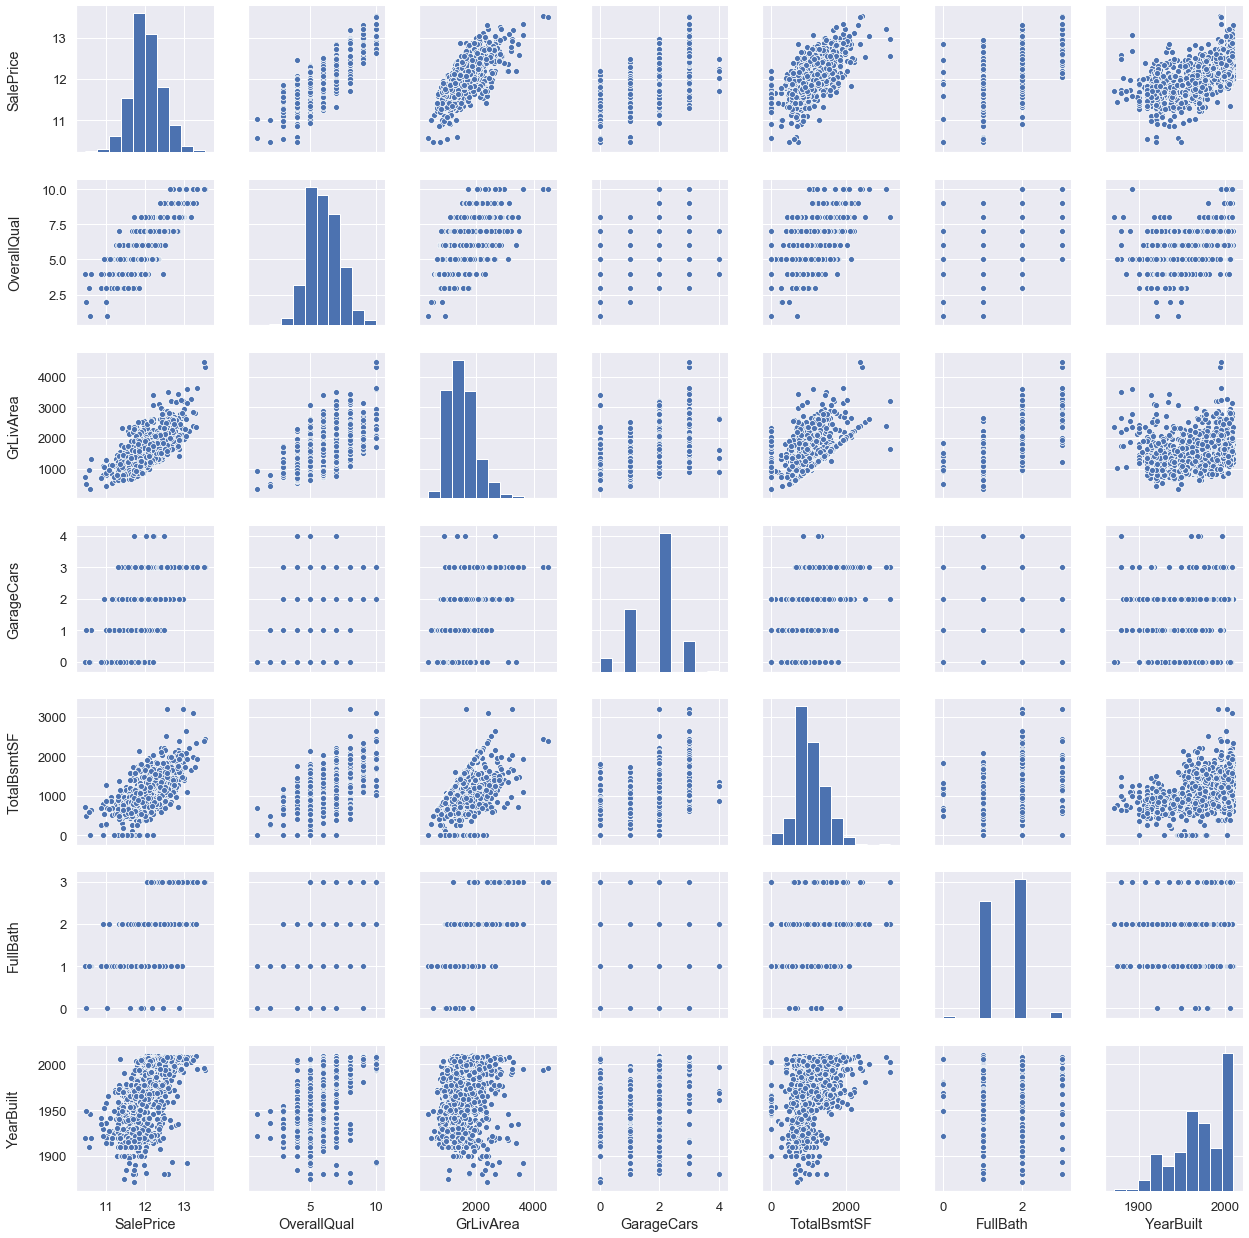

In [21]:
#Taking away variables with multicollinearity problem
#Plotting the rest against SalePrice
sns.set(font_scale = 1.2)
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
plot = sns.pairplot(train[cols])
for ax in plot.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.4,0.5)
plt.show();

In [22]:
y = train.SalePrice.values
train.drop(['SalePrice'], axis = 1, inplace = True)
data = pd.concat((train, test)).reset_index(drop = True)

In [23]:
#Finding out missing values for testing set
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], keys = ['Total', 'Percent'], axis = 1)
missing_data.head(34)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


In [24]:
for col in ('FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'MSSubClass'):
    data[col] = data[col].fillna('None')

In [25]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'MSZoning', 'SaleType', 'Utilities'):
    data[col] = data[col].fillna(data[col].mode()[0])

In [26]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')

In [27]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [28]:
data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)

LotFrontage    486
MasVnrType      24
MasVnrArea      23
dtype: int64

In [29]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [30]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [31]:
data.isnull().sum().max()

0

In [32]:
print(data.shape)

(2917, 79)


In [33]:
#check whether all data types correctly identified
data_type = data.dtypes
pd.set_option("display.max_rows", None, "display.max_columns", None)
data_type

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


In [34]:
# Features 'MSSubClass', 'YrSold', 'OverallCond' and 'MoSold' are supposed to be categorical features so change their type
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].apply(str)
data['MoSold'] = data['MoSold'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)

# Features 'LotArea' and 'MasVnrArea' are supposed to be numerical features so change their type
data['LotArea'] = data['LotArea'].astype(np.int64)
data['MasVnrArea'] = data['MasVnrArea'].astype(np.int64)

In [35]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [36]:
data['TotalBath'] = data['BsmtFullBath'] + data['FullBath'] + (0.5*data['BsmtHalfBath']) + (0.5*data['HalfBath'])

In [37]:
data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']

In [38]:
data['Porch_SF'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])

In [39]:
data['Has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasBsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasFirePlace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
data['Has2ndFlr'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasPool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [40]:
from sklearn.preprocessing import LabelEncoder
cat_col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cat_col:
    label = LabelEncoder() 
    label.fit(list(data[col].values)) 
    data[col] = label.transform(list(data[col].values))

In [41]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,YrBltAndRemod,Porch_SF,Has2ndfloor,HasBsmt,HasFirePlace,Has2ndFlr,HasPool
0,10,RL,65.0,8450,1,1,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal,2566.0,3.5,4006,61,1,1,0,1,0
1,5,RL,80.0,9600,1,1,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal,2524.0,2.5,3952,298,0,1,1,0,0
2,10,RL,68.0,11250,1,1,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal,2706.0,3.5,4003,42,1,1,1,1,0
3,11,RL,60.0,9550,1,1,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml,2473.0,2.0,3885,307,1,1,1,1,0
4,10,RL,84.0,14260,1,1,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal,3343.0,3.5,4000,276,1,1,1,1,0


In [42]:
data.shape

(2917, 88)

In [43]:
num_features = data.dtypes[data.dtypes != 'object'].index
skewed_features = data[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(15)

,Skew
MiscVal,21.939672
PoolArea,17.688664
HasPool,15.494756
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344


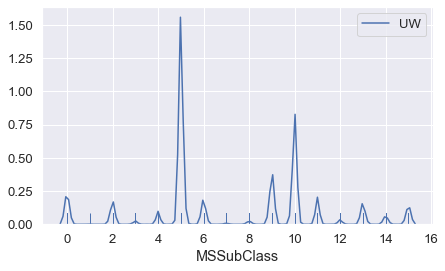

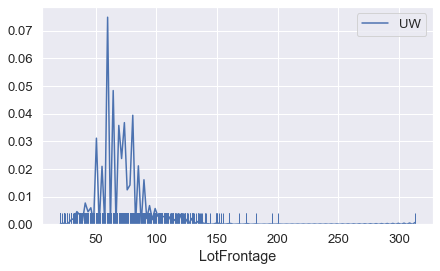

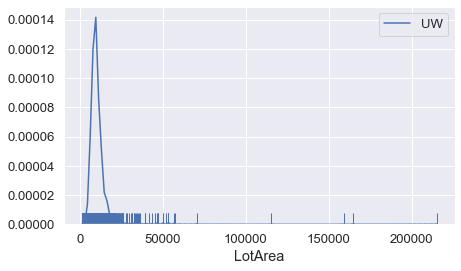

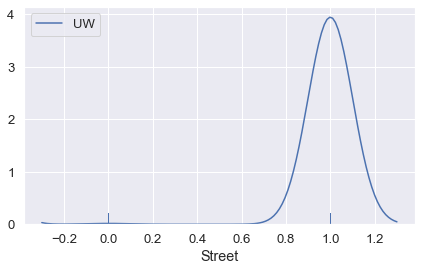

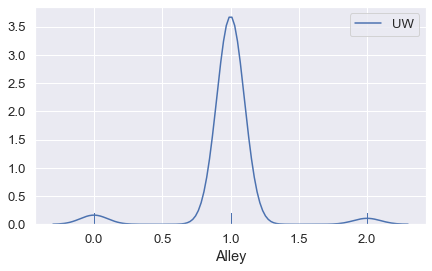

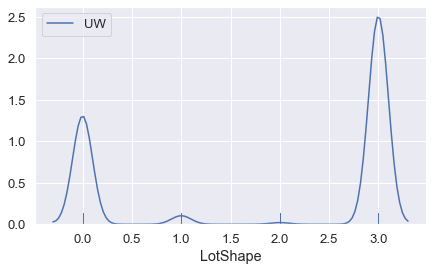

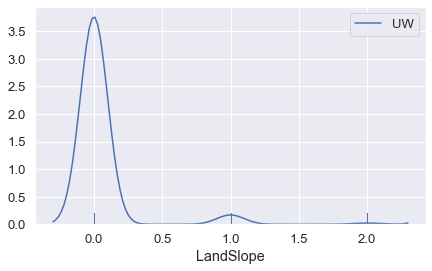

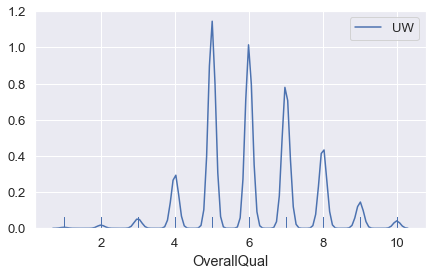

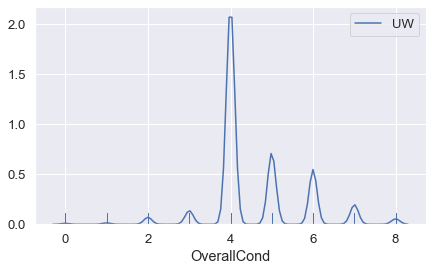

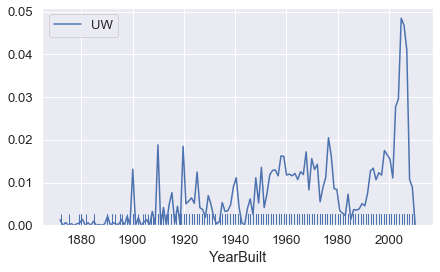

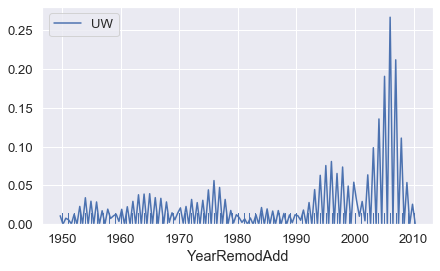

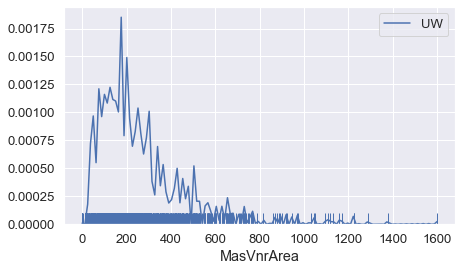

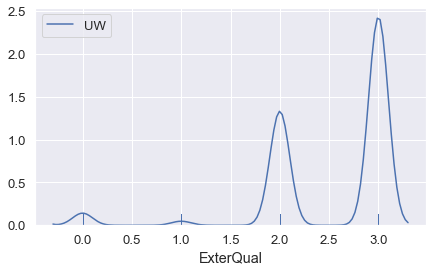

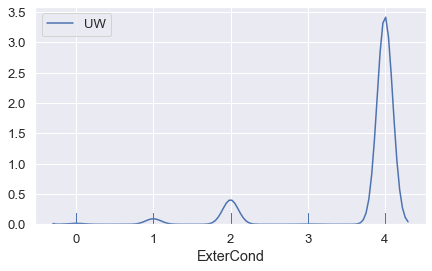

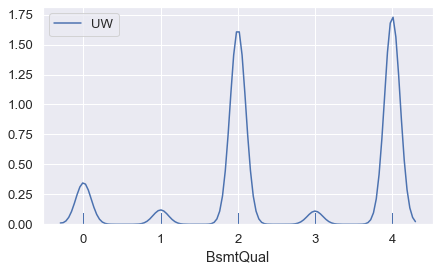

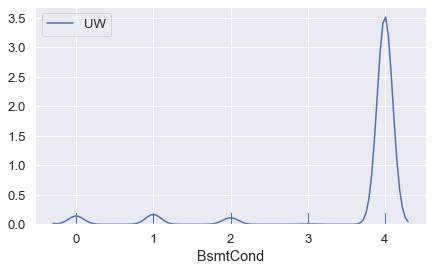

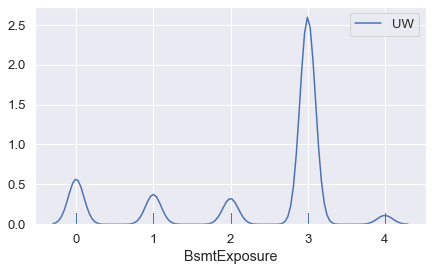

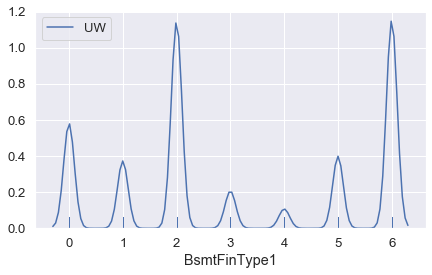

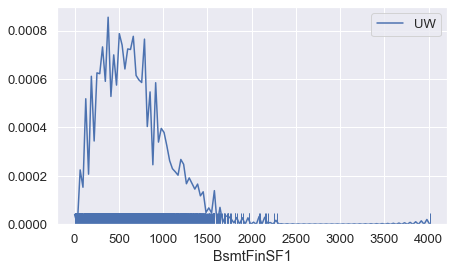

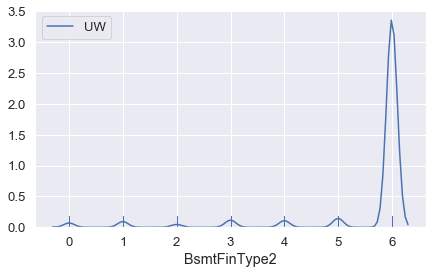

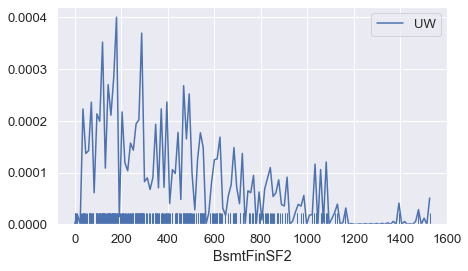

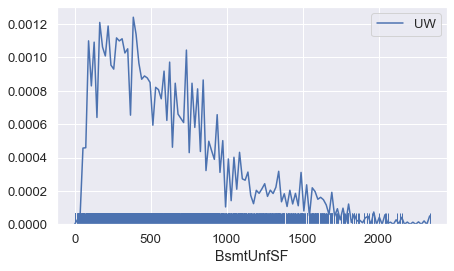

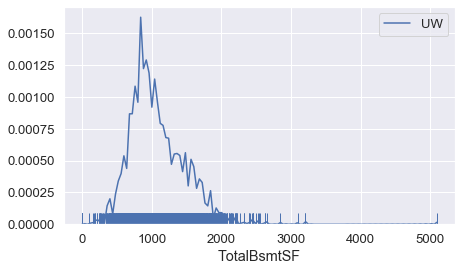

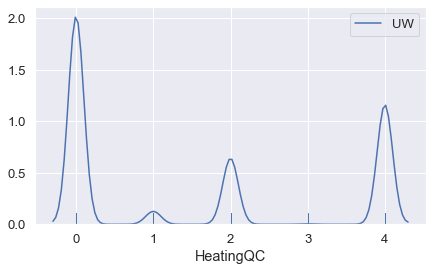

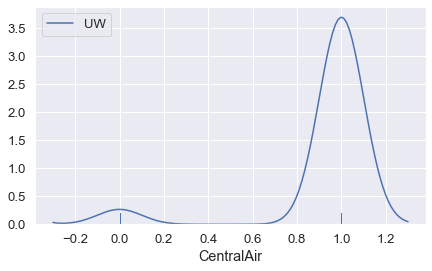

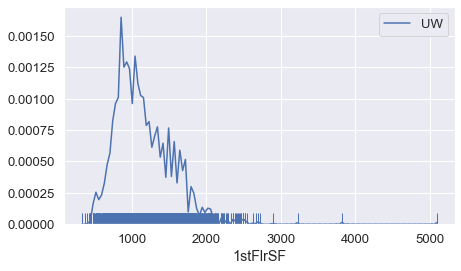

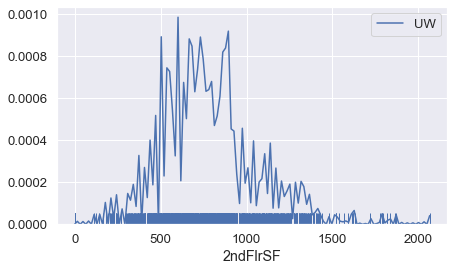

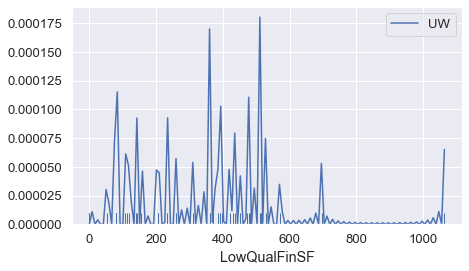

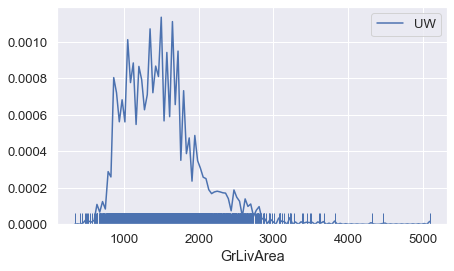

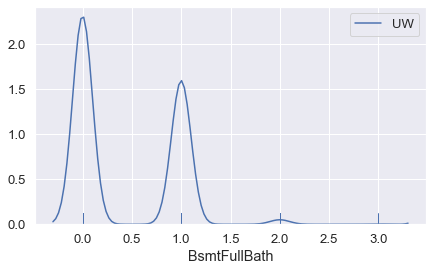

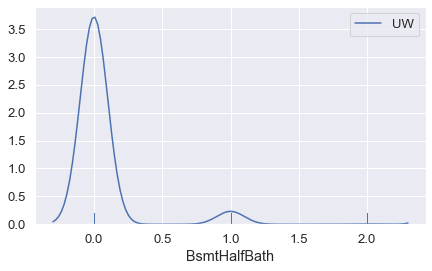

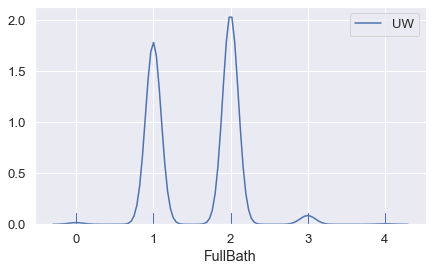

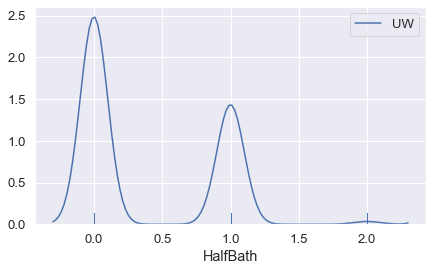

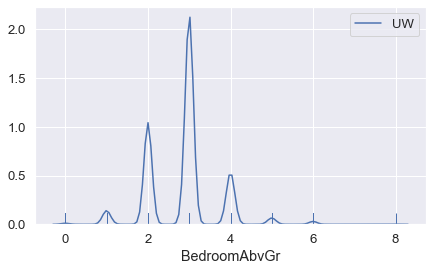

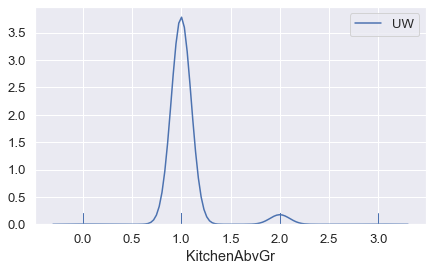

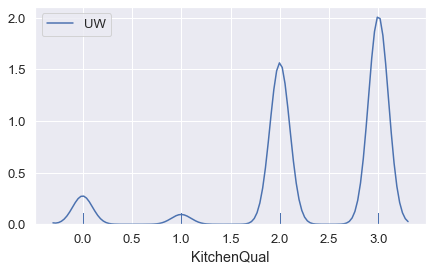

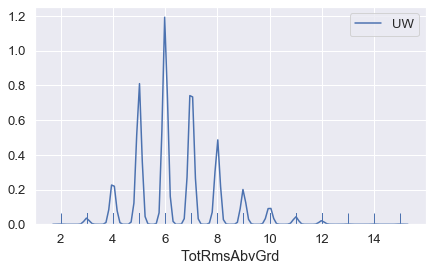

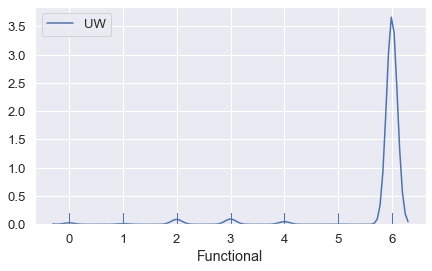

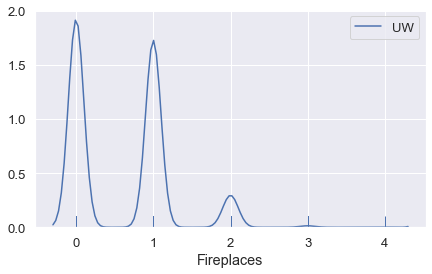

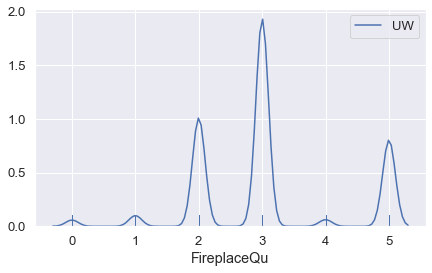

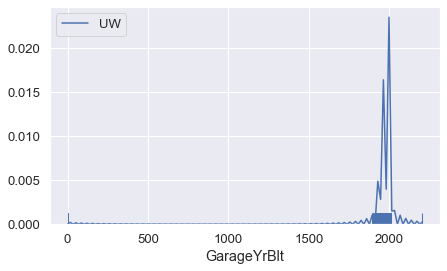

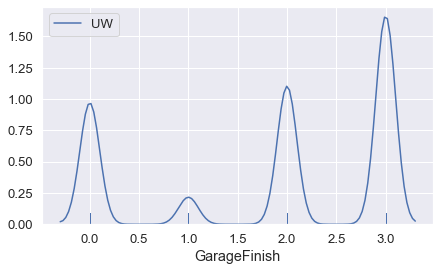

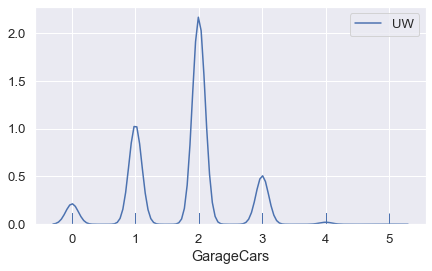

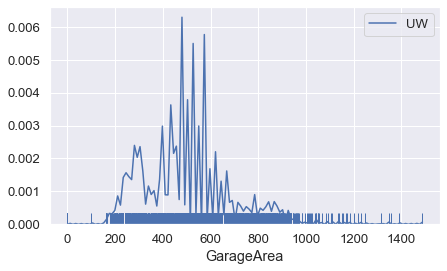

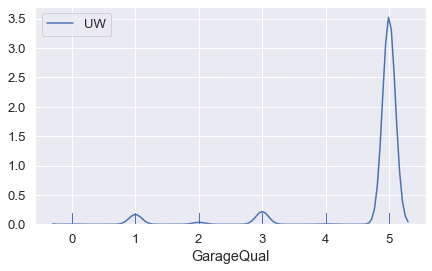

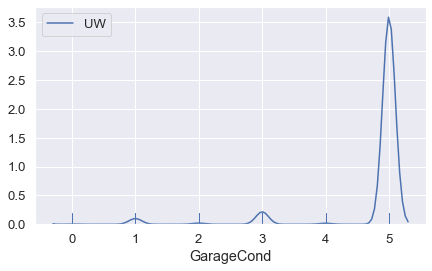

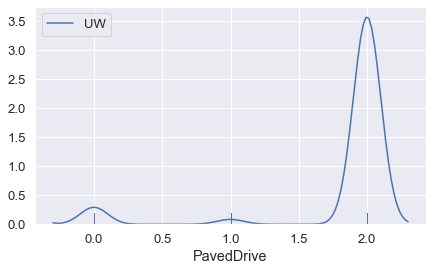

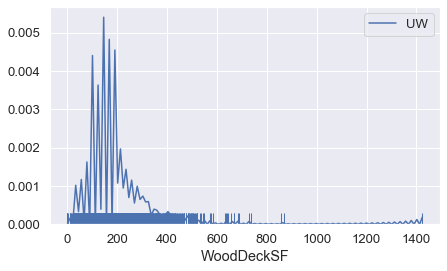

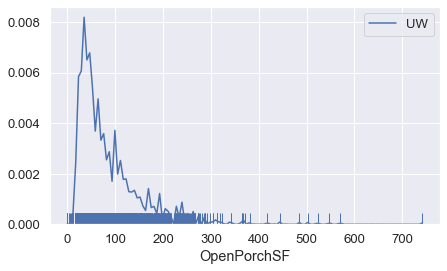

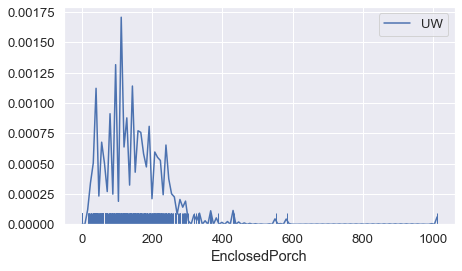

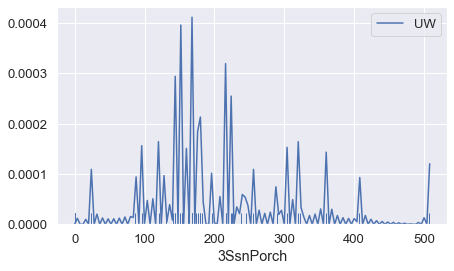

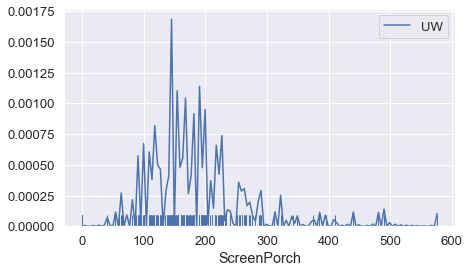

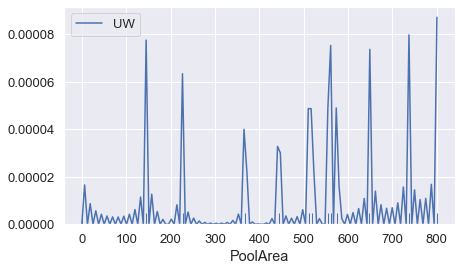

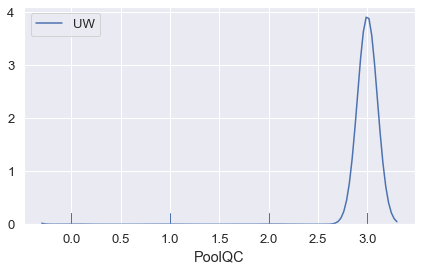

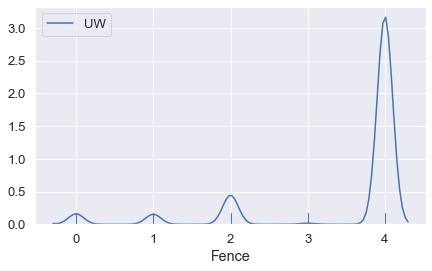

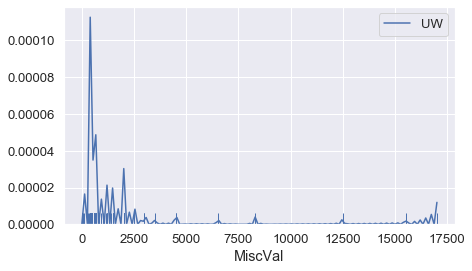

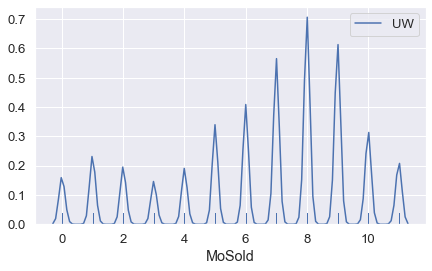

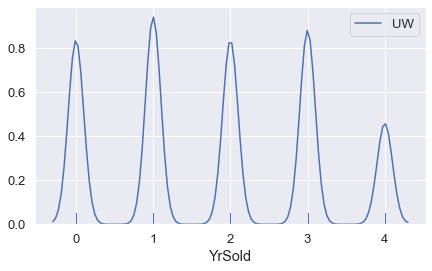

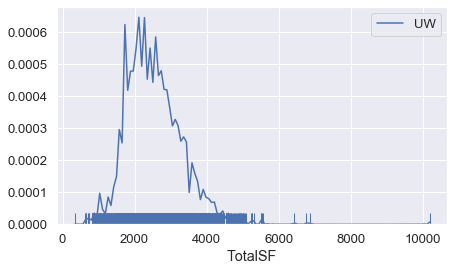

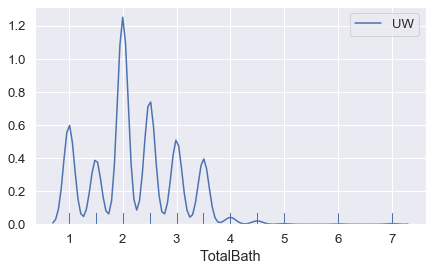

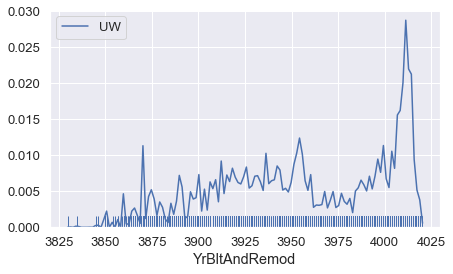

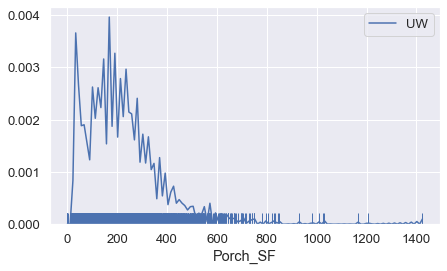

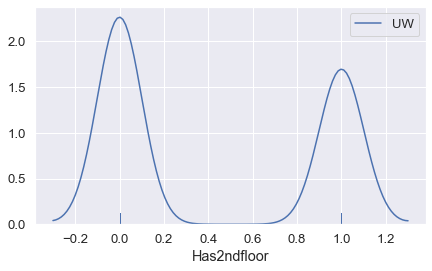

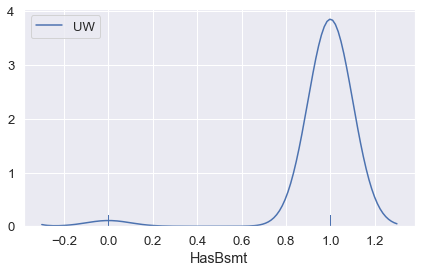

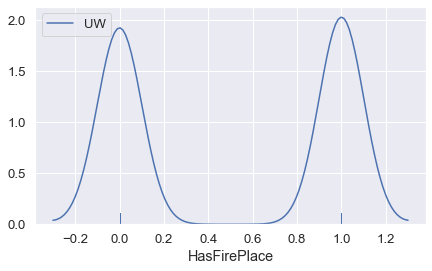

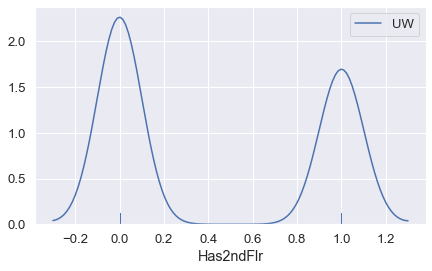

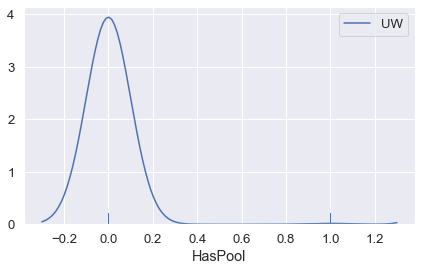

In [44]:
num_dataset = data.select_dtypes(exclude='object')

for i in range(len(num_dataset.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(num_dataset.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(num_dataset.columns[i])

In [45]:
skewness = skewed_features[abs(skewed_features) > 0.75]
skewed_features = skewness.index

lam = 0.15
for i in skewed_features:
    data[i] = boxcox1p(data[i], lam)

In [46]:
data = pd.get_dummies(data)

# Splitting dataset back into X and test data
X = data[:len(train)]
test = data[len(train):]

X.shape

(1458, 230)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)